<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/Gaming_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as mp

In [2]:
from google.colab import files
raw_data=files.upload()

Saving Gaming_data.csv to Gaming_data.csv


In [3]:
df=pd.read_csv('Gaming_data.csv')

In [4]:
df

,Steps,Points
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


#EDA

In [5]:
df.head()

,Steps,Points
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [6]:
df.tail()

,Steps,Points
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [8]:
df.iloc[3:6]

,Steps,Points
3,4,80000
4,5,110000
5,6,150000


In [9]:
df.describe()

,Steps,Points
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


Data cleaning

In [10]:
df.isnull().sum()

,0
Steps,0
Points,0


Label encoding

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Steps   10 non-null     int64
 1   Points  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


#x,y *split*

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
x

,Steps
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [14]:
y

,Points
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


#Train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.shape


(8, 1)

In [18]:
x_test.shape

(2, 1)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_predict=model.predict(x_test)

In [23]:
y_predict

array([550732.75862069, -64482.75862069])

In [24]:
y_test

,Points
8,500000
1,50000


In [25]:
error=y_predict-y_test

In [26]:
error

,Points
8,50732.758621
1,-114482.758621


In [27]:
import matplotlib.pyplot as plt


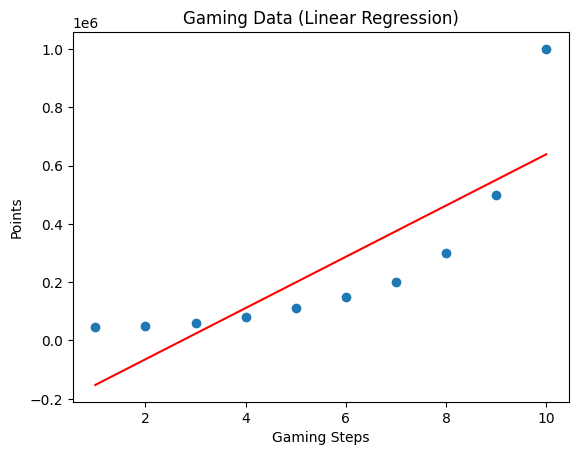

In [28]:
plt.scatter(x,y)
plt.plot(x, model.predict(x), color='red')
plt.title('Gaming Data (Linear Regression)')
plt.xlabel('Gaming Steps')
plt.ylabel('Points')
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly_reg = PolynomialFeatures(degree=5) # Tranforming
X_poly = poly_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

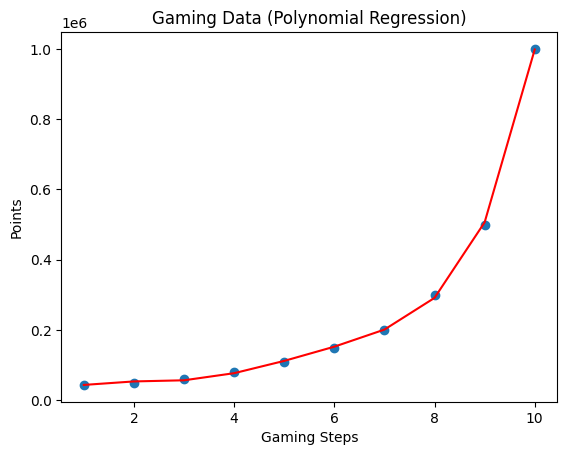

In [34]:
plt.scatter(x,y)
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)), color='red')
plt.title('Gaming Data (Polynomial Regression)')
plt.xlabel('Gaming Steps')
plt.ylabel('Points')
plt.show()